## Importing the modules and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.graph_objects as go
import plotly.offline as py
import seaborn as sns
from geopy.geocoders import Nominatim
from folium.plugins import HeatMap
from wordcloud import WordCloud
import folium
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/kaggle/input/zomato-bangalore-restaurants/zomato.csv


In [2]:
df = pd.read_csv('/kaggle/input/zomato-bangalore-restaurants/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
print(f"Data has {df.shape[0]} rows.")
print(f"Data has {df.shape[1]} columns. ")
df.dtypes # Checking dtypes of the dataframe

Data has 51717 rows.
Data has 17 columns. 


url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

**As we can see here, we need to fix some datatypes of some of our features such as rate and cost**

Columns Description <br>
- url - contains the url of the restaurant in the zomato website
- address - contains the address of the restaurant in Bengaluru
- name - contains the name of the restaurant
- online_order - whether online ordering is available in the restaurant or not
- book_table - table book option available or not
- rate contains - the overall rating of the restaurant out of 5
- votes - contains total number of rating for the restaurant as of the above mentioned date
- phone - contains the phone number of the restaurant
- location - contains the neighborhood in which the restaurant is located
- rest_type - restaurant type
- dish_liked - dishes people liked in the restaurant
- cuisines - food styles, separated by comma
- approx_cost(for two people) - contains the approximate cost for meal for two people
- reviews_list - list of tuples containing reviews for the restaurant, each tuple
- menu_item - contains list of menus available in the restaurant
- listed_in(type) - type of meal
- listed_in(city) - contains the neighborhood in which the restaurant is listed


In [4]:
# Checking for null values
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

Obviously we need to fix all these null values

#### Checking for duplicated values

In [5]:
df.duplicated().sum()

0

#### Renaming some column names

In [6]:
df = df.rename(columns={
    'approx_cost(for two people)':'cost',
    'listed_in(type)':'type',
    'listed_in(city)':'city'
})
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

#### Replacing NaN values in rate feature

In [7]:
# removing '/5' from rates
df['rate'] = df['rate'].apply(lambda x: str(x).replace('/5', ''))

In [8]:
df = df.loc[df['rate'] != 'NEW']
df = df.loc[df['rate'] != '-']

In [9]:
df['rate'] = df['rate'].astype('float')

In [10]:
df['rate'] = df['rate'].fillna(df['rate'].mean())

In [11]:
#rounding Rate colummn to one decimal point
df['rate'] = df['rate'].round(decimals = 1)

#### Replacing NaN values for cost

In [12]:
#Removing commas in prices
df['cost'] = df['cost'].apply(lambda x: str(x).replace(',', ''))

In [13]:
#Casting cost to float. then round it one decimal point
df['cost'] = df['cost'].astype(float)
df['cost'] = df['cost'].round(decimals = 1)

In [14]:
#Filling cost series with mean
df['cost'] = df['cost'].fillna(df['cost'].mean())

In [15]:
df = df.dropna(subset=['phone'])

In [16]:
df = df.fillna(df['cuisines'].value_counts().index[0])

In [17]:
df = df.fillna(df['rest_type'].value_counts().index[0])

### Outliers

<AxesSubplot:xlabel='rate'>

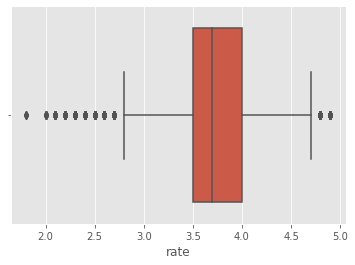

In [20]:
sns.boxplot(data=df,x="rate")

<AxesSubplot:xlabel='votes'>

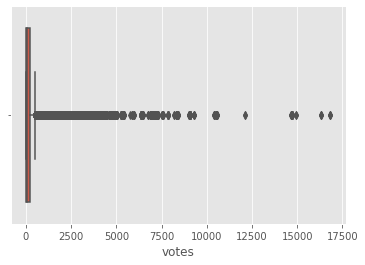

In [22]:
sns.boxplot(data=df,x="votes")

<AxesSubplot:xlabel='cost'>

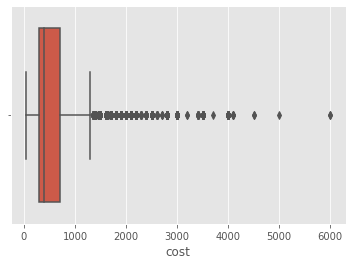

In [24]:
sns.boxplot(data=df,x="cost")

In [27]:
import datasist as ds
from datasist.structdata import detect_outliers

In [28]:
outlier= detect_outliers(df,0,[ 'rate', 'cost',"votes"])
len(outlier)

8673

In [29]:
df.drop(outlier,inplace=True)

## Exploratory data analysis (EDA)

#### Which are the top restaurant chains in bengaluru

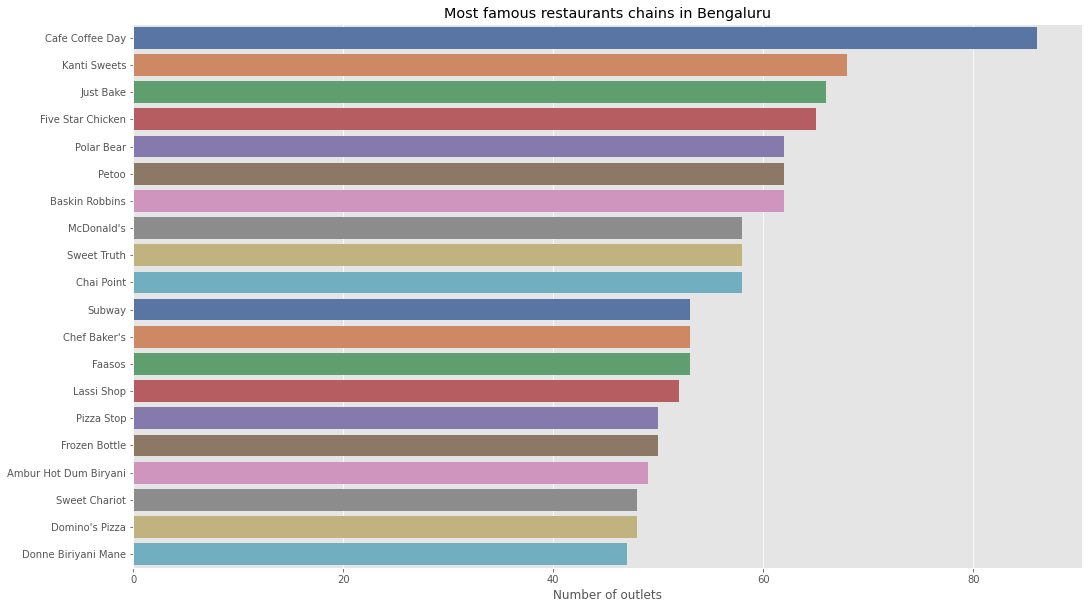

In [30]:
plt.figure(figsize=(17, 10))
top_chains = df['name'].value_counts()[:20]
sns.barplot(x=top_chains, y=top_chains.index, palette='deep')
plt.title('Most famous restaurants chains in Bengaluru')
plt.xlabel('Number of outlets')
plt.show()

**Observation**<br>
- Kanti Sweets and Cafe Coffee Day has the most number of outlets in and around bangalore.

#### Which is the most common Restaurant type in Banglore

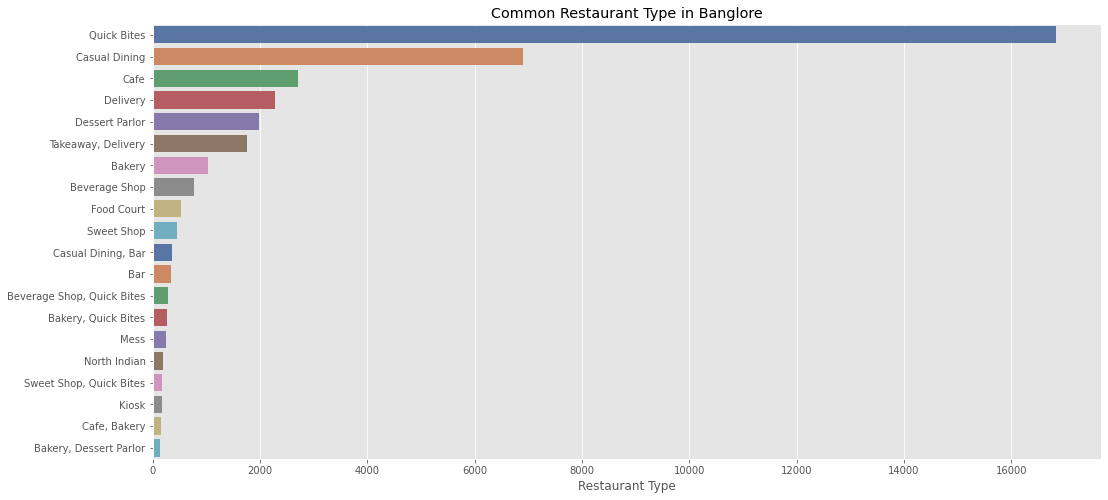

In [31]:
plt.figure(figsize=(17, 8))
rest_type = df['rest_type'].value_counts()[:20]
sns.barplot(x=rest_type, y=rest_type.index, palette='deep')
plt.title('Common Restaurant Type in Banglore')
plt.xlabel('Restaurant Type')
plt.show()

**Observation**<br>
- Casual Dining and Quick Bites type restaurant dominates.

#### What is the ratio between restaurants that provide and do not provide table booking

In [32]:
x = df['book_table'].value_counts()

colors = ['pink', 'purple']
trace = go.Pie(labels=x.index, 
               values=x, 
               hoverinfo='label+percent',
               textinfo='value',
               marker=dict(colors=colors, line=dict(color='#111111', width=1))
               )
layout=go.Layout(title="Table booking", width=500, height=500)
fig=go.Figure(data=[trace], layout=layout)
py.iplot(fig, filename='pie_chart_subplots')

**Observation**<br>
- Most of the Restaurants do not offer table booking

#### How many of the restaurants do not accept online orders ?

In [33]:
x = df['online_order'].value_counts()

colors = ['pink', 'purple']
trace = go.Pie(labels=x.index, 
               values=x, 
               hoverinfo='label+percent',
               textinfo='value',
               marker=dict(colors=colors, line=dict(color='#111111', width=1))
               )
layout=go.Layout(title="Accepting vs not accepting online orders", width=500, height=500)
fig=go.Figure(data=[trace], layout=layout)
py.iplot(fig, filename='pie_chart_subplots')

**Observation**<br>
- As clearly indicated, almost 60% of restaurants in Bangalore accepts the online orders and delivery.

#### Rating Distributions

In [34]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

<AxesSubplot:xlabel='rate', ylabel='Density'>

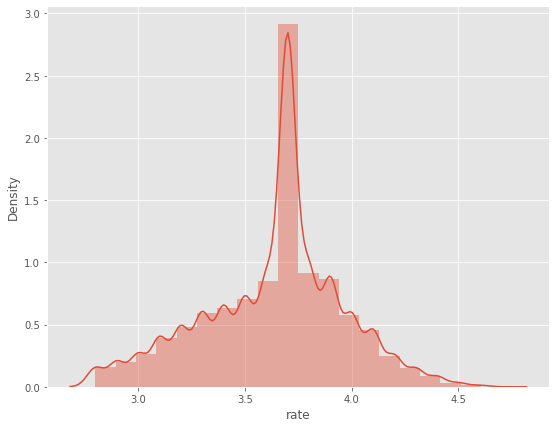

In [35]:
# How ratings are distributed
plt.figure(figsize=(9, 7))
sns.distplot(df['rate'], bins=20)

**Observation**<br>
- Most of the value lie between 3.5 and 4.5

#### Cost Vs Rating

<AxesSubplot:xlabel='rate', ylabel='cost'>

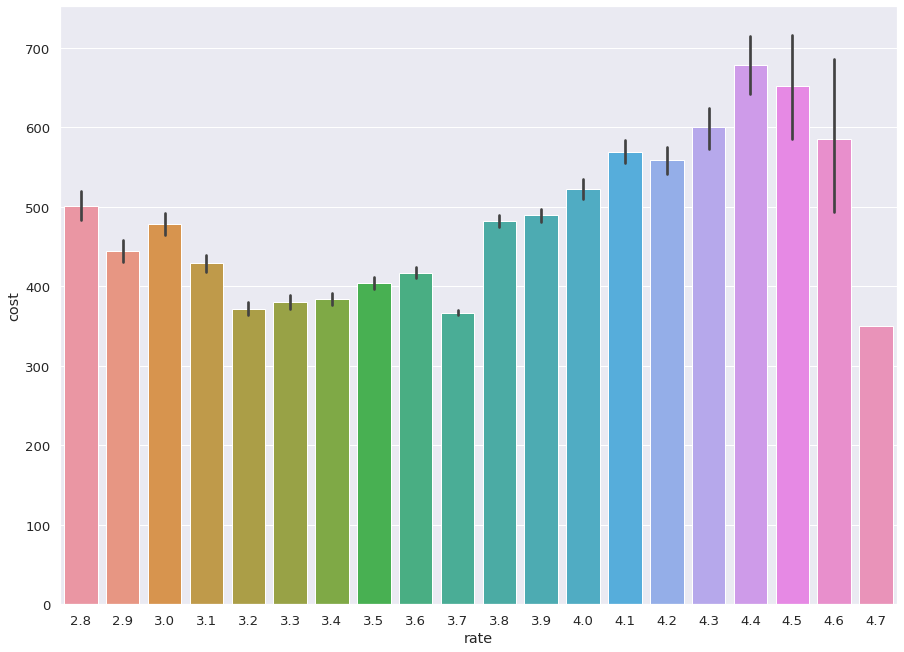

In [37]:
sns.set(rc={'figure.figsize': [15, 11]}, font_scale=1.2)
sns.barplot(data=df,x="rate",y="cost")

> We can see that as the rate increases, cost increases as well. However, there are some anomalies

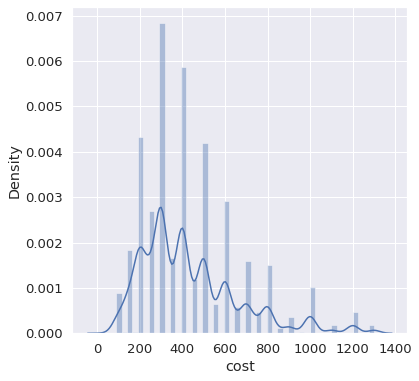

In [38]:
plt.figure(figsize=(6,6))
sns.distplot(df['cost'])
plt.show()

**Observation**<br>
- The distribution is left skewed. This means almost 90% of restaurants serve food for budget less than 1000INR.

#### Is there any difference b/w votes of restaurants accepting and not accepting online orders

In [39]:
yes_votes = df[df['online_order'] == 'Yes']['votes']
trace0 = go.Box(y=yes_votes, name='Accepting Online Orders',
                marker=dict(
                    color = 'rgb(214, 12, 140)',
                ))
no_votes = df[df['online_order'] == 'No']['votes']
trace1 = go.Box(y=no_votes, name='Not Accepting Online Orders',
                marker=dict(
                    color='rgb(0, 128, 128)',
                ))
layout = go.Layout(
    title='Box Plots of Votes', width=800, height=500
)
data=[trace0, trace1]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


**Observation**<br>
- The median number of votes for both categories vary.
- Restaurants accepting online orders tend to get more votes from customers as there is a rating option poping after each order through zomato application.

#### Cost Factor

In [40]:
trace0 = go.Box(y=df['cost'], name='Accepting Online Orders',
                marker=dict(
                    color='rgb(214, 12, 140)'
                ))
data = [trace0]
layout = go.Layout(title='Box Plot of Approximate Cost', width=800, height=500, yaxis=dict(title='Price'))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

**Observation**<br>
- The median approximate cost for two people is 400 for a single meal.
- 50% percent of restaurants charge between 300 and 550 for s single meal for two people.

#### Finding Best Budget Restaurants in any location

In [41]:
def find_budget_rest(location, rest):
    """
    pass location and restaurant type as parameters, functin will return name of restaurants.
    """
    budget = df[(df['cost'] <= 600) & (df['location'] == location) & (df['rate'] > 4) & (df['rest_type'] == rest)]
    return budget['name'].unique()

In [44]:
find_budget_rest('BTM', 'Quick Bites')

array(['Litti Twist', 'The Shawarma Shop', 'Gorbandh', 'Yum In My Tum',
       'Chaatimes', "Muthashy's", 'Swad Punjab Da', 'Hungry Lee',
       "Domino's Pizza", 'Roti Wala', 'Mojo Pizza - 2X Toppings',
       'Andhra Kitchen'], dtype=object)

#### Which are the foodie areas ?

<AxesSubplot:xlabel='location'>

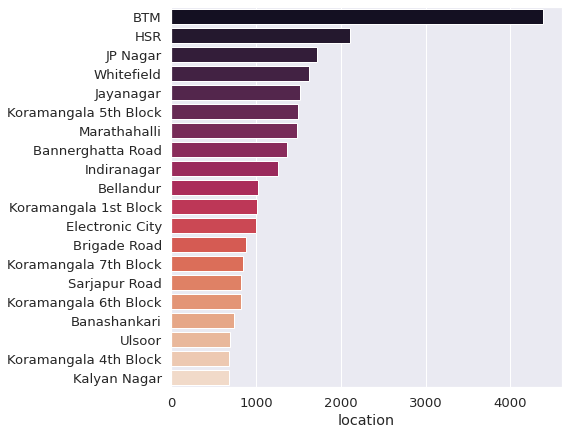

In [45]:
plt.figure(figsize=(7,7))
locations = df['location'].value_counts()[:20]
sns.barplot(locations, locations.index, palette='rocket')

**Observation**<br>
- We can see that **JP Nagar, HSR and BTM** has the most number of restaurants.
- **BTM** dominates the section by having more than 1750 restaurants.

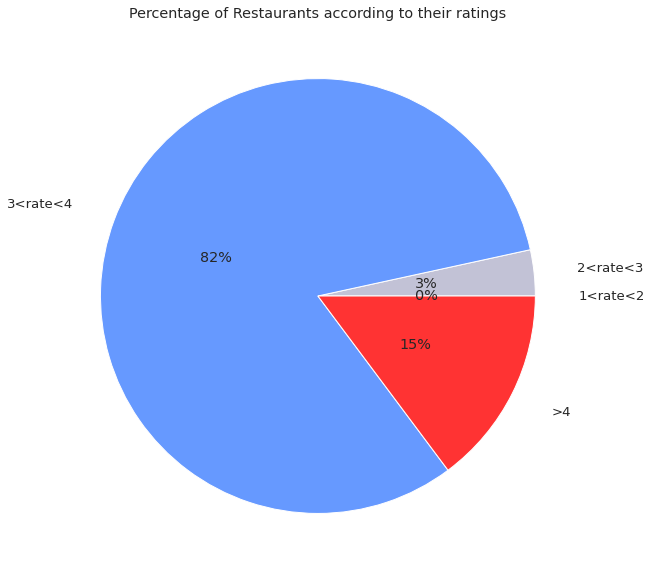

In [46]:
# plot ratings as between "1 and 2", "2 and 3", "3 and 4" and "4 and 5"
df['rate'] = df['rate'].astype(float)
slices = [((df['rate'] >= 1) & (df['rate'] < 2)).sum(),
           ((df['rate']>=2) & (df['rate']<3)).sum(),
        ((df['rate']>=3) & (df['rate']<4)).sum(),
        (df['rate']>=4).sum()]

labels=['1<rate<2','2<rate<3','3<rate<4','>4']
colors = ['#ff3333','#c2c2d6','#6699ff']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=False)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their ratings")

fig.set_size_inches(10,10)
plt.show()

#### Which are the most common cuisines in each location ?

In [47]:
new_df = df.groupby(['location', 'cuisines']).agg('count')
new_df.sort_values(['url'], ascending=False).groupby(['location'], as_index=False).apply(lambda x : x.sort_values(by='url', ascending=False).head(3))['url'].reset_index().rename(columns={'url':'count'})

,level_0,location,cuisines,count
0,0,BTM,"North Indian, Chinese",350
1,0,BTM,North Indian,281
2,0,BTM,Biryani,107
3,1,Banashankari,South Indian,78
4,1,Banashankari,"North Indian, Chinese",54
...,...,...,...,...
264,91,Yelahanka,"South Indian, Biryani",2
265,91,Yelahanka,Andhra,1
266,92,Yeshwantpur,"North Indian, Chinese",16
267,92,Yeshwantpur,"South Indian, North Indian, Chinese",7


#### Extracting location Information using Geopy

In [48]:
locations = pd.DataFrame({"Name":df['location'].unique()})
locations['Name'] = locations['Name'].apply(lambda x: "Bangalore "+str(x))
locations.head()
lat_lon = []
geolocator = Nominatim(user_agent='app')
for location in locations['Name']:
    loc = geolocator.geocode(location)
    if loc is None:
        lat_lon.append(np.nan)
    else:
        geo = (loc.latitude, loc.longitude)
        lat_lon.append(geo)

locations['geo_loc'] = lat_lon
locations.to_csv('locations.csv', index=False)

In [49]:
locations['Name'] = locations['Name'].apply(lambda x:x.replace("Bangalore", '')[1:])
locations.head()

,Name,geo_loc
0,Banashankari,"(12.965283249999999, 77.59445195)"
1,Basavanagudi,"(12.9417261, 77.5755021)"
2,Mysore Road,"(12.9357828, 77.51399)"
3,Kumaraswamy Layout,"(12.9081487, 77.5553179)"
4,Vijay Nagar,NaN


- I have found out latitude and longtitude of each location in listed in the dataset using geopy.

#### Heatmap of restaurant count on each location

In [52]:
rest_locations = pd.DataFrame(df['location'].value_counts().reset_index())
rest_locations.columns=['Name', 'count']
rest_locations = rest_locations.merge(locations, on='Name', how='left').dropna()

In [53]:
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [54]:
lat, lon = zip(*np.array(rest_locations['geo_loc']))
rest_locations['lat'] = lat
rest_locations['lon'] = lon
basemap = generateBaseMap()
HeatMap(rest_locations[['lat', 'lon', 'count']].values.tolist(), zoom=20, radius=15).add_to(basemap)

In [55]:
basemap

**Observation**<br>
- It is clear that restaurants tend to concentrate in centraol bangalore area.
- The clutter of restaurants lowers as we move away fron central.
- So, potential restaurant entrepreneurs can refer this and find out good location for their ventur.

#### Which are the most popular cuisines of Bangalore ?

Text(0.5, 1.0, 'Most Popular cuisines of Bangalore')

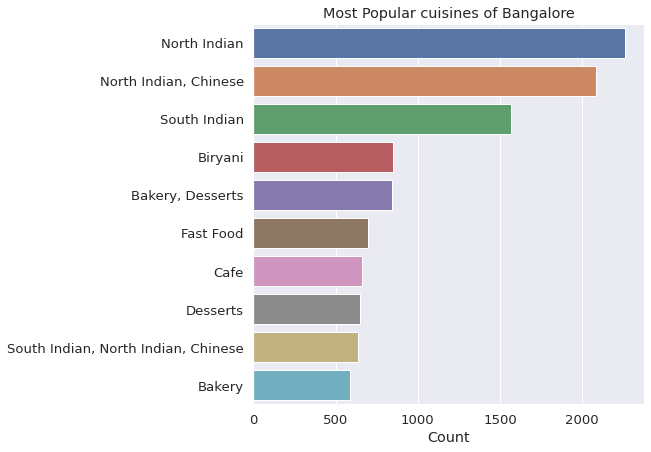

In [56]:
plt.figure(figsize=(7,7))
cuisines = df['cuisines'].value_counts()[:10]
sns.barplot(cuisines, cuisines.index)
plt.xlabel('Count')
plt.title('Most Popular cuisines of Bangalore')


**Observation**<br>
- The North Indian, chinese, South Indian and Briyani are most common.
- Is this imply the fact that Bangalore is more influenced by North Indian Culture more than South?

#### Heatmap of North Indian Restaurants

In [57]:
def produce_data(col, name):
    data = pd.DataFrame(df[df[col] == name].groupby(['location'], as_index=False)['url'].agg('count'))
    data.columns=['Name', 'count']
    print(data.head())
    data = data.merge(locations, on='Name', how='left').dropna()
    data['lat'], data['lon'] = zip(*data['geo_loc'].values)
    return data.drop(['geo_loc'], axis=1)

In [58]:
north_india = produce_data('cuisines', 'North Indian')

                Name  count
0                BTM    281
1       Banashankari     25
2          Banaswadi     12
3  Bannerghatta Road     52
4       Basavanagudi     15


In [59]:
basemap=generateBaseMap()
HeatMap(north_india[['lat', 'lon', 'count']].values.tolist(), zoom=20, radius=15).add_to(basemap)
basemap

**Observation**<br>
- Interesting to see a cluster of North Indian Restaurants in South Bangalore area!
- This may indicate that these areas are more populated by North Indians.

#### What about South Indian Cuisines ?

In [60]:
south_india = produce_data('cuisines', 'South Indian')
# south_india.columns
basemap = generateBaseMap()
HeatMap(south_india[['lat', 'lon', 'count']].values.tolist(), zoom=20, radius=15).add_to(basemap)
basemap

                Name  count
0                BTM    106
1       Banashankari     78
2          Banaswadi     35
3  Bannerghatta Road     44
4       Basavanagudi     64


**Observation**<br>
- They tend to span all over Bangalore.
- South Indian cuisines tend to cluster near central Bangalore.

#### Analysing Restaurant Chains

In [61]:
def produce_chains(name):
    data_chain = pd.DataFrame(df[df['name'] == name]['location'].value_counts().reset_index())
    data_chain.columns = ['Name', 'count'] 
    data_chain = data_chain.merge(locations, on='Name', how='left').dropna()
    data_chain['lan'], data_chain['lon'] = zip(*data_chain['geo_loc'].values)
    return data_chain[['Name', 'count', 'lan', 'lon']]

In [62]:
new_df = df.groupby(['rest_type', 'name']).agg('count')
datas = new_df.sort_values(['url'], ascending=False).groupby(['rest_type'], as_index=False).apply(lambda x:x.sort_values(by='url', ascending=False).head(3))['url'].reset_index().rename(columns={'url':'count'})

#### Which are the most populat casual dining restaurant chains ?

In [63]:
casual = datas[datas['rest_type'] == 'Casual Dining']
casual

,level_0,rest_type,name,count
53,23,Casual Dining,New Prashanth Hotel,38
54,23,Casual Dining,Beijing Bites,36
55,23,Casual Dining,Chung Wah,35


**Observation**<br>
- We can see the New Prashanth Hotel, Beijing Bites and Chung Wah are the most popular casual dining restaurant chains in Bangalore

#### Where are their outlets located ?

In [64]:
mapbox_access_token="pk.eyJ1Ijoic2hhaHVsZXMiLCJhIjoiY2p4ZTE5NGloMDc2YjNyczBhcDBnZnA5aCJ9.psBECQ2nub0o25PgHcU88w"

In [65]:
def produce_trace(data_chain, name):
    data_chain['text'] = data_chain['Name']+'<br>'+data_chain['count'].astype(str)
    trace = go.Scattermapbox(
        lat = data_chain['lan'],
        lon = data_chain['lon'],
        mode='markers',
        marker = go.scattermapbox.Marker(
            size = data_chain['count']*4
        ),
        text=data_chain['text'],
        name = name
    )
    return trace

In [66]:
data = []
for row in casual['name']:
    data_chain = produce_chains(row)
    trace_0 = produce_trace(data_chain, row)
    data.append(trace_0)
    
layout = go.Layout(title='Casual Dining Restaurant chains locations around Bangalore',
                   autosize=True,
                   hovermode='closest',
                   mapbox=dict(
                       accesstoken=mapbox_access_token,
                       bearing=0, style='streets',
                       center = dict(
                           lat=12.96,
                           lon=77.59
                       ),
                       pitch=0,
                       zoom=10
                   ))
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Montreal Mapbox')

**Observation**<br>
- **New Prashanth Hotel** has 9 outlets in Richmond Road, which is the most in a single location.
- **New Prashanth Hotel and Beijing Bite** is present in all over Bangalore.

#### Top Quick Bites restaurant chains in Bangalore

In [67]:
quick = datas[datas['rest_type'] == 'Quick Bites']
quick

,level_0,rest_type,name,count
139,58,Quick Bites,Five Star Chicken,64
140,58,Quick Bites,McDonald's,58
141,58,Quick Bites,Ambur Hot Dum Biryani,49


#### Where are their outlets located ?

In [68]:
data = []
for row in quick['name']:
    data_chain = produce_chains(row)
    trace_0 = produce_trace(data_chain, row)
    data.append(trace_0)
    
layout = go.Layout(title='Quick Bites Restaurant chains locations around Bangalore',
                   autosize=True,
                   hovermode='closest',
                   mapbox=dict(
                       accesstoken=mapbox_access_token,
                       bearing=0,
                       style='streets',
                       center=dict(
                           lat=12.96,
                           lon=77.59
                       ),
                       pitch=0,
                       zoom=10
                   ))
fig = dict(data=data, layout=layout)
py.iplot(fig, filename="Montreal Mapbox")

#### Top Cafes of Bangalore ?

In [69]:
cafe = datas[datas['rest_type'] == 'Cafe']
cafe

,level_0,rest_type,name,count
35,15,Cafe,Cafe Coffee Day,86
36,15,Cafe,Fabcafe,23
37,15,Cafe,The Coffee Bean & Tea Leaf,22


**Observation**<br>
- No surprise, Cafe coffee day restaurant dominated way over other cafe chains in Bangalore.
- Cafe coffee day has 96 outlets in Bangalore.
- Cafe coffee Day was started as a retail restaurant in 1996. The first CCD outlet was setup on July 11, 1996 at Brigade Road, Bengaluru, Karnataka.

#### Where are their outlets located ?

In [70]:
data = []
for row in cafe['name']:
    data_chain = produce_chains(row)
    trace0 = produce_trace(data_chain, row)
    data.append(trace0)
    
layout = go.Layout(title='Cafe Restaurant chains locations around Bangalore',
                   autosize=True,
                   hovermode='closest',
                   mapbox=dict(
                       accesstoken = mapbox_access_token,
                       bearing = 0, style='streets',
                       center = dict(
                           lat = 12.96,
                           lon = 77.59
                       ),
                       pitch=0,
                       zoom=10
                   ))

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Montreal Mapbox')

#### Wordcloud of dishes liked by cuisines.

In [71]:
df['dish_liked'] = df['dish_liked'].apply(lambda x:x.split(',') if type(x) == str else [''])

## Feature Engineering

#### Converting the categorical columns into integer

In [72]:
df['online_order'] = pd.get_dummies(df['online_order'], drop_first=True)

In [73]:
df['book_table'] = pd.get_dummies(df['book_table'], drop_first=True)

#### One Hot Encoding on location | Rest_type feature

In [74]:
location_dummies = pd.get_dummies(df['location'])
rest_type_dummies = pd.get_dummies(df['rest_type'])
type_dummies = pd.get_dummies(df['type'])

In [75]:
final_df = pd.concat([df, location_dummies, rest_type_dummies, type_dummies], axis=1)
final_df.head(1)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,...,"Sweet Shop, Quick Bites",Takeaway,"Takeaway, Delivery",Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,+91 9620009302,Banashankari,Quick Bites,...,0,0,0,1,0,0,0,0,0,0


#### Drop the extra columns

In [76]:
final_df = final_df.drop(['url','address', 'name', 'rest_type', 'location', 'cuisines', 'dish_liked', 'reviews_list', 'menu_item','phone', 'city', 'type'], axis=1)
final_df.head(1)

,online_order,book_table,rate,votes,cost,BTM,Banashankari,Banaswadi,Bannerghatta Road,Basavanagudi,...,"Sweet Shop, Quick Bites",Takeaway,"Takeaway, Delivery",Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars
3,0,0,3.7,88,300.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


#### Check Features Correlation

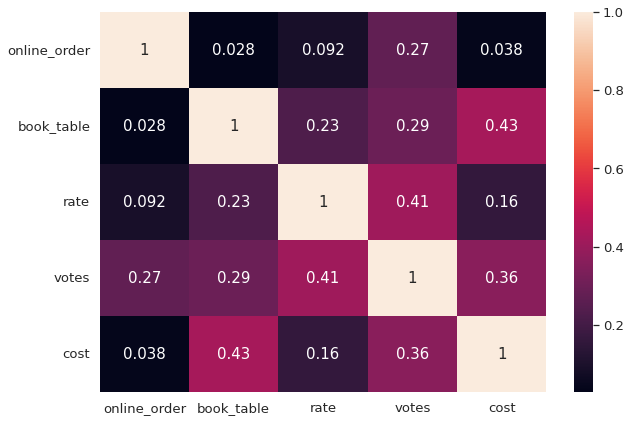

In [78]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, annot_kws={"size":15})
plt.show()

#### Feature Selection

In [79]:
final_df.to_csv('zomato_PPD.csv', index=False)

In [80]:
# Splitting the features into independent and dependent variables

X = final_df.drop(['rate'], axis=1)
X.head()

,online_order,book_table,votes,cost,BTM,Banashankari,Banaswadi,Bannerghatta Road,Basavanagudi,Basaveshwara Nagar,...,"Sweet Shop, Quick Bites",Takeaway,"Takeaway, Delivery",Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars
3,0,0,88,300.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,166,600.0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5,1,0,286,600.0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,8,800.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,0,324,700.0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [81]:
X.columns

Index(['online_order', 'book_table', 'votes', 'cost', 'BTM', 'Banashankari',
       'Banaswadi', 'Bannerghatta Road', 'Basavanagudi', 'Basaveshwara Nagar',
       ...
       'Sweet Shop, Quick Bites', 'Takeaway', 'Takeaway, Delivery', 'Buffet',
       'Cafes', 'Delivery', 'Desserts', 'Dine-out', 'Drinks & nightlife',
       'Pubs and bars'],
      dtype='object', length=177)

In [82]:
y = final_df['rate']

**Feature importance**<br>
- Feature importance gives you a score for each feature of your data, the higher the score the more important or relevant is the feature towards the output variable
- Feature importance is an in built class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [83]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

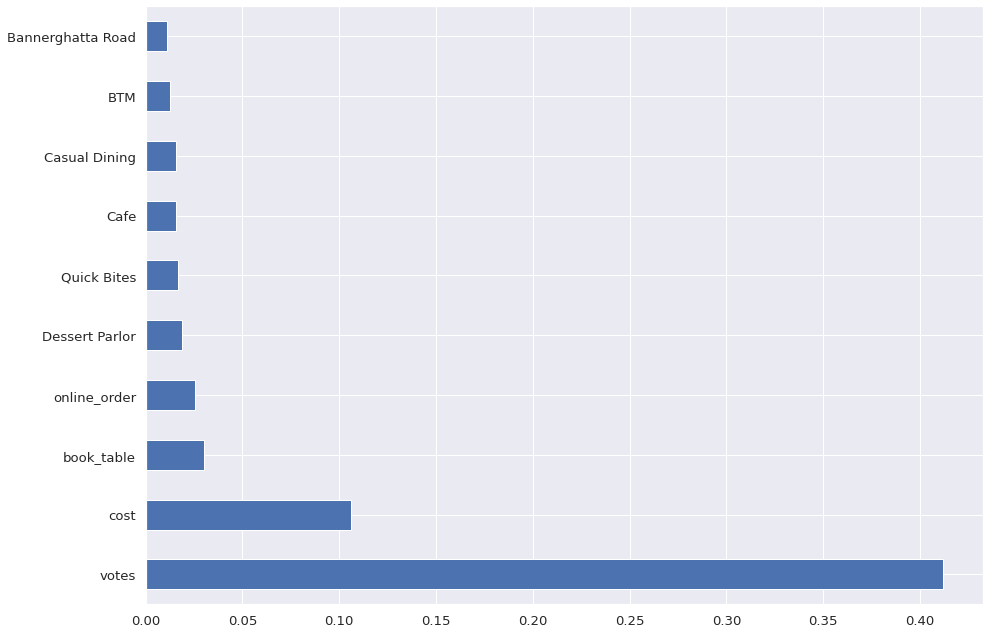

In [84]:
# Plotting graph of feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

**--------------------**

## Model Building

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

#### Applying Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(criterion='mse')
dtree.fit(X_train, y_train)

In [ ]:
dtree_pred = dtree.predict(X_test)

In [ ]:
X_train.head()

In [ ]:
r2 = metrics.r2_score(y_test, dtree_pred)
print('R-Square Score: ', r2*100)

# Calculate the absolute errors (MAE)
dtree_error = abs(dtree_pred - y_test)
print("Mean Absolute Error: ", round(np.mean(dtree_pred), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (dtree_error / y_test)

# Calculate and display accuracy
dtree_accuracy = 100 - np.mean(mape)
print('Accuracy for Decision tree regressor is: ', round(dtree_accuracy, 2), '%')

In [ ]:
# Plotting the Random Forest values predicted rating
plt.figure(figsize=(12, 7))
plt.scatter(y_test, X_test.iloc[:,2], color='blue')
plt.title('True rate vs Predicted rate', size=20, pad=15)
plt.xlabel('Rating', size=15)
plt.ylabel('Frequency', size=15)
plt.scatter(dtree_pred, X_test.iloc[:,2], color='yellow')
plt.legend()
plt.show()

## Model Deployment

In [ ]:
import joblib

joblib.dump(model,'model.h5')
joblib.dump(scaler,'scaler.h5')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)